# Introduction


In this project, we will apply K-Means clustering to address the following questions:

- Which regions have similar average rice prices across a given period?
- Can we group markets based on how they price different rice types?

Additionally, we will answer the following questions through time series and descriptive analysis:

- How has the price of rice changed in different regions over time?
- Which regions experience the most volatile rice prices?
- Is there an existing seasonal pattern in rice price volatility?

The [dataset](https://data.humdata.org/dataset/wfp-food-prices-for-philippines), sourced from the World Food Programme Price Database, offers an in-depth look at food prices in the Philippines. Covering key staples such as maize, rice, beans, fish, and sugar, it serves as a valuable tool for analyzing the dynamics of the nation’s food economy.

| **Column Name** | **Description**                                                                                                |
| --------------- | -------------------------------------------------------------------------------------------------------------- |
| `date`          | The date when the food price was recorded. Helps track trends over time.                                       |
| `admin1`        | The first-level administrative region (e.g., province or region like "Metro Manila").                          |
| `admin2`        | The second-level administrative region (e.g., city or municipality within a province).                         |
| `market`        | The name of the specific market where the price was observed.                                                  |
| `latitude`      | Geographic latitude of the market. Useful for mapping and regional analysis.                                   |
| `longitude`     | Geographic longitude of the market.                                                                            |
| `category`      | Broad classification of the food (e.g., cereals, meats, legumes).                                              |
| `commodity`     | Specific food item being priced (e.g., "Rice (local)", "Sugar", "Tilapia").                                    |
| `unit`          | The unit of measurement for the price (e.g., "kg", "piece", "liter").                                          |
| `priceflag`     | Indicates how the price was obtained: `"actual"` (directly recorded) or `"aggregate"` (averaged or estimated). |
| `pricetype`     | Type of market price: typically `"retail"` or `"wholesale"`.                                                   |
| `currency`      | Currency in which the price is reported — usually `"Philippine Peso"`.                                         |
| `price`         | The reported price of the commodity in the local currency and unit.                                            |
| `usdprice`      | The same price converted to USD (based on exchange rates at the time).                                         |


In [3]:
import pandas as pd

pd.set_option('display.max_columns', 500)
food_prices_data = pd.read_csv("wfp_food_prices_phl.csv", skiprows=[1])

food_prices_data.shape


(198764, 16)

1 row containing the metadata for each column was skipped when reading the dataset


# Data Cleaning and Exploration


In [57]:
# Number of data and features 
print(food_prices_data.shape)
print(len(str(food_prices_data.shape))*'-')

# Check how many types of data are in the dataset
print(food_prices_data.dtypes.value_counts())
print(len(str(food_prices_data.shape))*'-')

# Check the first 16 columns
food_prices_data.head(16)


(198764, 16)
------------
object     10
float64     4
int64       2
Name: count, dtype: int64
------------


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,Maize flour (yellow),573,KG,actual,Retail,PHP,15.00,0.37
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Retail,PHP,20.00,0.49
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Wholesale,PHP,18.35,0.45
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Retail,PHP,18.00,0.44
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Wholesale,PHP,16.35,0.40
5,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,"meat, fish and eggs",Meat (pork),140,KG,actual,Retail,PHP,105.37,2.60
6,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Retail,PHP,19.00,0.47
7,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Wholesale,PHP,18.00,0.44
8,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Retail,PHP,18.10,0.45
9,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,"meat, fish and eggs",Meat (pork),140,KG,actual,Retail,PHP,77.00,1.90


In [58]:
# Check The amount of regions recorded
for region in food_prices_data['admin1'].unique():
    print(region)


print(f"TOTAL REGION: {food_prices_data['admin1'].nunique()}")

National Capital region
Region III
Region IX
Region VI
Region VII
Region XI
Region XII
Autonomous region in Muslim Mindanao
Cordillera Administrative region
Region I
Region II
Region IV-A
Region IV-B
Region V
Region VIII
Region X
Region XIII
TOTAL REGION: 17


### Check for Missing Values


In [59]:
food_prices_data.isnull().sum()

date            0
admin1          0
admin2          0
market          0
market_id       0
latitude        0
longitude       0
category        0
commodity       0
commodity_id    0
unit            0
priceflag       0
pricetype       0
currency        0
price           0
usdprice        0
dtype: int64

### Check Column Values


In [60]:
commodity_counts = food_prices_data["commodity"].value_counts().reset_index()
commodity_counts.columns = ["commodity", "count"]
print(commodity_counts.to_string(index=False))

                          commodity  count
             Rice (regular, milled)   8781
                        Meat (pork)   7052
                           Tomatoes   6566
                            Carrots   6530
                            Cabbage   6344
      Meat (beef, chops with bones)   6029
              Meat (chicken, whole)   5857
                       Onions (red)   5737
                               Eggs   5638
                   Potatoes (Irish)   5435
                 Rice (well milled)   4838
                          Eggplants   4833
                    Fish (milkfish)   4630
                       Bitter melon   4584
                     Rice (special)   4523
                   Fish (roundscad)   4433
                            Coconut   4338
            Meat (pork, with bones)   4322
                     Fish (tilapia)   4195
                        Meat (beef)   4037
                       Beans (mung)   4035
                  Bananas (lakatan)   3941
           

In [61]:
food_prices_data["currency"].value_counts()

currency
PHP    198764
Name: count, dtype: int64

### Filter Unnecessary Data


In [62]:
food_prices_data = food_prices_data.drop(columns=["category", "currency", "latitude", "longitude"])
food_prices_data.head()

,date,admin1,admin2,market,market_id,commodity,commodity_id,unit,priceflag,pricetype,price,usdprice
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,Maize flour (yellow),573,KG,actual,Retail,15.00,0.37
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Retail,20.00,0.49
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Wholesale,18.35,0.45
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Retail,18.00,0.44
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Wholesale,16.35,0.40


Since we will only be focusing on rice prices, the category column is unnecessary because we will only have 1 category. Currency will also be removed since all valUes in price column are in PHP


### Change Data Types


Convert price, latitude, and longitude to numbers, and date to datetime format. Invalid entries are safely turned into NaN or NaT using errors="coerce".


In [63]:
food_prices_data["price"] = pd.to_numeric(food_prices_data["price"], errors="coerce")
# food_prices_data["latitude"] = pd.to_numeric(food_prices_data["latitude"], errors="coerce")
# food_prices_data["longitude"] = pd.to_numeric(food_prices_data["longitude"], errors="coerce")
food_prices_data["date"] = pd.to_datetime(food_prices_data["date"], errors="coerce")

print(food_prices_data.dtypes.value_counts())

object            7
int64             2
float64           2
datetime64[ns]    1
Name: count, dtype: int64


### Filter Rice From Commodities


In [64]:
all_rice_df = food_prices_data[food_prices_data["commodity"].str.startswith("Rice", na=False)]

all_rice_df["commodity"].value_counts()



commodity
Rice (regular, milled)     8781
Rice (well milled)         4838
Rice (special)             4523
Rice (milled, superior)    2850
Rice (paddy)                664
Rice (premium)              620
Name: count, dtype: int64

Since we only need rice commodities, we need to filter out all data that aren't rice


In [65]:
all_rice_df = all_rice_df[(all_rice_df['date'] >= '2015-01-01') & (all_rice_df['date'] <= '2025-12-31')]

all_rice_df.shape

(16990, 12)

All data entries must be between 2015 - 2025


In [66]:
all_rice_df["admin1"].value_counts()


admin1
Region III                              1475
Region VI                               1335
Region V                                1210
Region VIII                             1166
Region XI                               1116
Cordillera Administrative region        1081
Region IV-A                             1040
Region X                                1009
Region IV-B                              995
Region XIII                              978
Region XII                               959
Region VII                               958
Autonomous region in Muslim Mindanao     848
Region II                                831
Region I                                 825
Region IX                                747
National Capital region                  417
Name: count, dtype: int64

In [67]:
all_rice_df["admin2"].value_counts()


admin2
Davao del Sur          655
Iloilo                 456
South Cotabato         425
Cebu                   423
Metropolitan Manila    417
                      ... 
Ifugao                 134
Sarangani              133
Compostela Valley      130
Sulu                    67
Camarines Sur           18
Name: count, Length: 79, dtype: int64

In [68]:
all_rice_df["market"].value_counts()

market
Metro Manila           417
Davao City             390
Iloilo City            279
Cebu City              258
Koronadal              241
                      ... 
Cagayan de Oro City     31
Tacloban City           30
San Fernando City       29
Calapan City            19
Naga City               18
Name: count, Length: 108, dtype: int64

In [69]:
all_rice_df["pricetype"].value_counts()

pricetype
Retail       16081
Wholesale      909
Name: count, dtype: int64

In [70]:
all_rice_df["unit"].value_counts()

unit
KG    16990
Name: count, dtype: int64

In [71]:
all_rice_df["priceflag"].value_counts()

priceflag
actual              16374
aggregate             522
actual,aggregate       94
Name: count, dtype: int64

In [72]:
all_rice_df.head(30)

,date,admin1,admin2,market,market_id,commodity,commodity_id,unit,priceflag,pricetype,price,usdprice
19048,2015-01-15,Autonomous region in Muslim Mindanao,Maguindanao,Shariff Aguak,183,"Rice (regular, milled)",80,KG,actual,Retail,35.82,0.80
19060,2015-01-15,Cordillera Administrative region,Benguet,La Trinidad,168,"Rice (regular, milled)",80,KG,actual,Retail,40.80,0.91
19074,2015-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Retail,43.84,0.98
19075,2015-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Wholesale,39.90,0.89
19076,2015-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Retail,40.03,0.90
19077,2015-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Wholesale,34.80,0.78
19080,2015-01-15,Region I,Pangasinan,Lingayen,169,"Rice (regular, milled)",80,KG,actual,Retail,36.32,0.81
19093,2015-01-15,Region II,Cagayan,Tuguegarao City,170,"Rice (regular, milled)",80,KG,actual,Retail,35.85,0.80
19106,2015-01-15,Region III,Nueva Ecija,Palayan,171,"Rice (milled, superior)",593,KG,actual,Retail,44.31,0.99
19107,2015-01-15,Region III,Nueva Ecija,Palayan,171,"Rice (milled, superior)",593,KG,actual,Wholesale,40.27,0.90


# Time-Series and Descriptive Analysis

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy import stats
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import calendar
import matplotlib.cm as cm
import plotly.express as px

## Rice Price Volatility Across Philippine Regions (2015–2025)


In [74]:
def get_region_group(region):
    luzon = ['National Capital region', 'Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', 'Region V', 'Cordillera Administrative region']
    visayas = ['Region VI', 'Region VII', 'Region VIII']
    mindanao = ['Region IX', 'Region X', 'Region XI', 'Region XII', 'Region XIII', 'Autonomous region in Muslim Mindanao']
    if region in luzon:
        return "Luzon"
    elif region in visayas:
        return "Visayas"
    elif region in mindanao:
        return "Mindanao"
    else:
        return ""


# Create a new column in the all_rice_df to specify which region group(Luzon, Visayas, Mindanao) it belongs to
all_rice_df["region_group"] = all_rice_df["admin1"].apply(get_region_group)

luzon_trends = all_rice_df.loc[all_rice_df["region_group"] == "Luzon"].groupby(["admin1", "date"])["price"].mean().reset_index()
visayas_trends = all_rice_df.loc[all_rice_df["region_group"] == "Visayas"].groupby(["admin1", "date"])["price"].mean().reset_index()
mindanao_trends = all_rice_df.loc[all_rice_df["region_group"] == "Mindanao"].groupby(["admin1", "date"])["price"].mean().reset_index()


### Luzon Trend


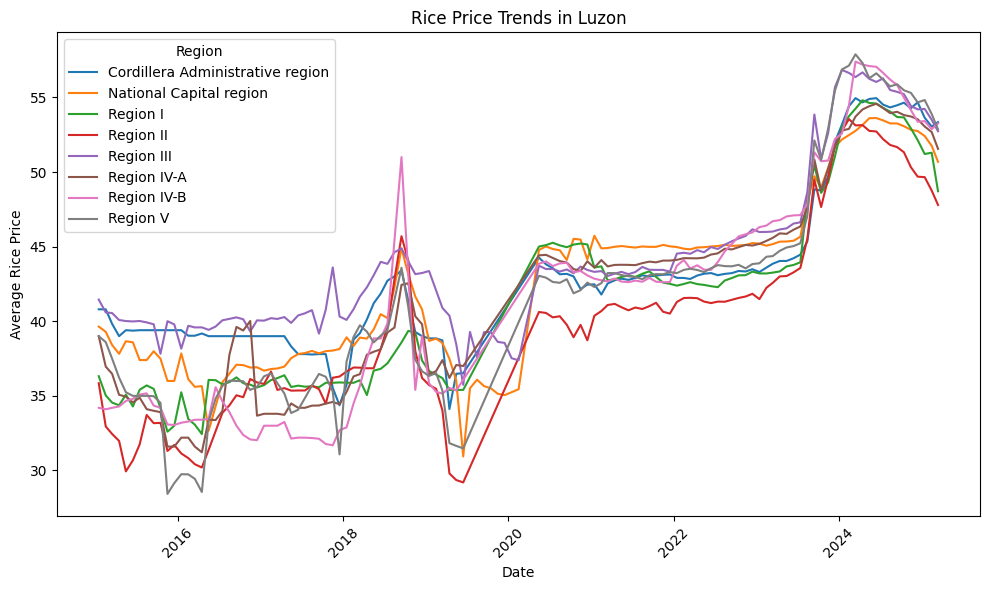

In [75]:
plt.figure(figsize=(10, 6))
for region in luzon_trends["admin1"].unique():
    region_data = luzon_trends[luzon_trends["admin1"] == region]
    plt.plot(region_data["date"], region_data["price"], label=region)
    

plt.xlabel("Date") 
plt.ylabel("Average Rice Price")   
plt.title("Rice Price Trends in Luzon")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()



### Visayas Trend


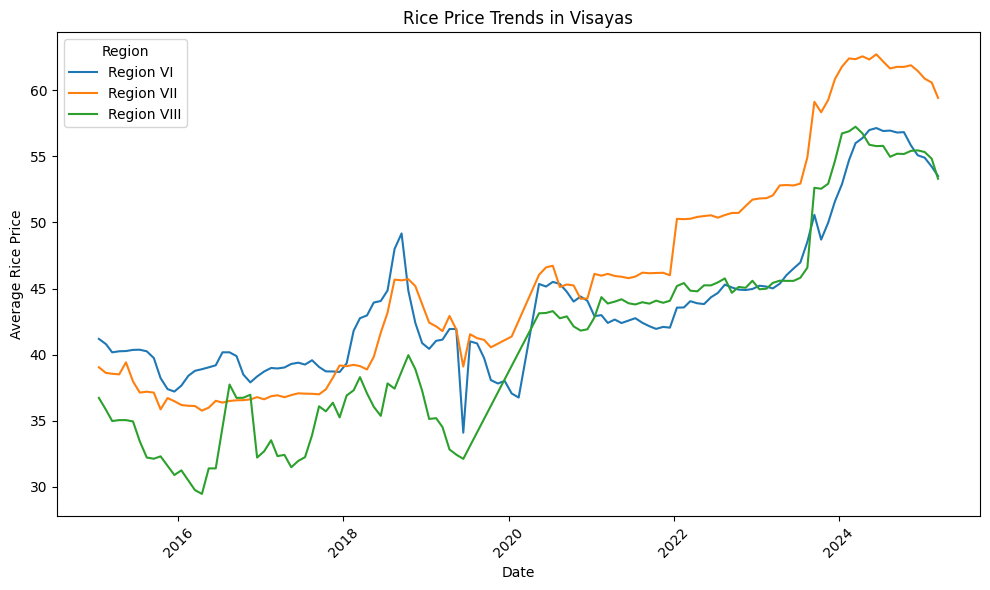

In [76]:
plt.figure(figsize=(10, 6))
for region in visayas_trends["admin1"].unique():
    region_data = visayas_trends[visayas_trends["admin1"] == region]
    plt.plot(region_data["date"], region_data["price"], label=region)
    

plt.xlabel("Date") 
plt.ylabel("Average Rice Price")   
plt.title("Rice Price Trends in Visayas")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

### Mindanao Trend


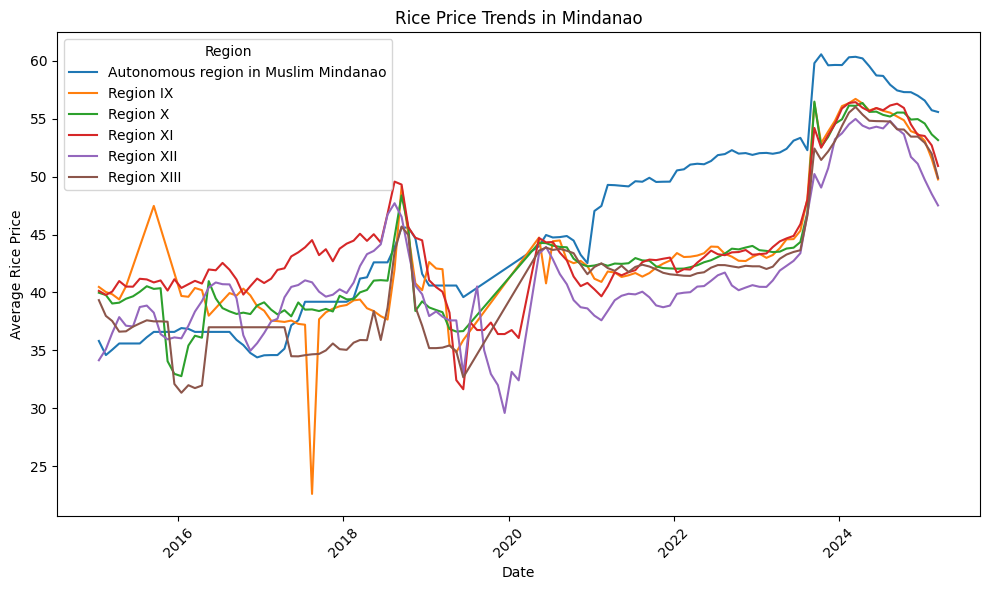

In [77]:
plt.figure(figsize=(10, 6))
for region in mindanao_trends["admin1"].unique():
    region_data = mindanao_trends[mindanao_trends["admin1"] == region]
    plt.plot(region_data["date"], region_data["price"], label=region)
    

plt.xlabel("Date") 
plt.ylabel("Average Rice Price")   
plt.title("Rice Price Trends in Mindanao")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

The rice price trends across Luzon, Visayas, and Mindanao from 2015 to 2025 show distinct patterns and regional variations. In Luzon, the data indicates significant volatility from 2015 to 2020, with a sharp price spike around 2018 followed by a notable drop in 2019. This fluctuation may be attributed to policy changes such as the implementation of the [Rice Tariffication Law in 2019](https://lawphil.net/statutes/repacts/ra2019/ra_11203_2019.html). After 2020, prices across Luzon generally stabilized and began a steady climb, culminating in a sharp increase around late 2023 to 2024. Regions such as Region V and Region IV-B experienced the highest average prices during this period, peaking around 57 PHP/kg, while Region II consistently reported lower prices, possibly due to more stable local supply or better distribution systems.

In contrast, the Visayas region demonstrated a more consistent upward trend in rice prices over the years. While there were occasional fluctuations, the trends were less erratic than those in Luzon. Region VII (Central Visayas) saw the steepest rise post-2023, reaching over 60 PHP/kg, while Region VIII began with the lowest prices but gradually caught up, possibly indicating increasing demand or supply limitations in recent years. Overall, the Visayas exhibited a more uniform growth in rice prices, with a sharp but steady rise starting mid-2023.

Meanwhile, Mindanao displayed a mix of fluctuations and anomalies in the earlier years, particularly in Region IX, which had an unusual drop around 2017—likely due to local disruptions or data inconsistencies. After 2020, rice prices across Mindanao began to steadily increase, with a major spike occurring between 2023 and 2024. The  Autonomous Region in Muslim Mindanao (ARMM) recorded the highest rice prices in this period, surpassing 60 PHP/kg, reflecting potential supply chain difficulties or broader economic factors. While other regions in Mindanao like Regions XII and XIII saw relatively slower growth, the general trend pointed to rising costs across the island group.

In summary, the graphs reflect a nationwide surge in rice prices starting in 2023, likely influenced by global inflation, climatic disturbances, or economic policy shifts. Luzon experienced the most price variability over the years, Visayas showed a consistent upward trend, and Mindanao faced a steep increase post-2023—especially in ARMM. These trends highlight regional disparities in agricultural supply chains and market dynamics within the Philippines.



## Regions with the most volatile rice prices


We must calculate the monthly averages for each region, then use standard deviation and coefficient of variation (CV) to determine the volatility of rice prices


In [78]:
# Calculate rice price per month
monthly_rice_price = all_rice_df.copy()
monthly_rice_price["year_month"] = monthly_rice_price["date"].dt.to_period("M")
monthly_avg_by_region = monthly_rice_price.groupby(["year_month", "admin1"])["price"].mean().reset_index()
monthly_avg_by_region['year_month'] = monthly_avg_by_region['year_month'].dt.to_timestamp() 

monthly_avg_by_region


,year_month,admin1,price
0,2015-01-01,Autonomous region in Muslim Mindanao,35.820000
1,2015-01-01,Cordillera Administrative region,40.800000
2,2015-01-01,National Capital region,39.642500
3,2015-01-01,Region I,36.320000
4,2015-01-01,Region II,35.850000
...,...,...,...
1944,2025-03-01,Region VIII,53.301111
1945,2025-03-01,Region X,53.149333
1946,2025-03-01,Region XI,50.916667
1947,2025-03-01,Region XII,47.513636


In [79]:
volatility_metrics = {}

In [80]:
def calculate_volatility(group):
    # Standard deviation
    std_dev = group['price'].std()
    
    # Coefficient of Variation (CV) = std_dev / mean
    mean_price = group['price'].mean()
    cv = std_dev / mean_price if mean_price > 0 else 0
    
    # Range (max - min) / mean
    price_range = group['price'].max() - group['price'].min()
    range_ratio = price_range / mean_price if mean_price > 0 else 0
    
    # Return a Series with metrics
    return pd.Series({
        'mean_price': mean_price,
        'std_dev': std_dev,
        'cv': cv, 
        'range_ratio': range_ratio,
        'count': len(group),
        'min_price': group['price'].min(),
        'max_price': group['price'].max()
    })


In [81]:
# Calculate volatility by Region
volatility_by_region = all_rice_df.groupby('admin1').apply(calculate_volatility, include_groups = False).reset_index()
volatility_by_region = volatility_by_region.sort_values('cv', ascending=False)

print("Volatility By Region")
volatility_by_region.head(20)

Volatility By Region


,admin1,mean_price,std_dev,cv,range_ratio,count,min_price,max_price
11,Region VII,49.231232,14.457639,0.293668,1.890670,958.0,31.42,124.50
0,Autonomous region in Muslim Mindanao,51.257700,10.327408,0.201480,1.264786,848.0,31.92,96.75
10,Region VI,46.149963,8.783685,0.190329,0.843771,1335.0,28.60,67.54
7,Region IV-B,46.426412,8.419563,0.181353,1.056941,995.0,27.86,76.93
5,Region III,46.812312,8.366355,0.178721,0.824783,1475.0,32.45,71.06
4,Region II,43.360385,7.485251,0.172629,0.730621,831.0,29.20,60.88
2,National Capital region,42.012710,7.244619,0.172439,0.773337,417.0,28.97,61.46
3,Region I,45.368715,7.808248,0.172106,0.856758,825.0,32.44,71.31
12,Region VIII,46.891913,7.928971,0.169090,1.024270,1166.0,29.47,77.50
9,Region V,46.248909,7.800062,0.168654,0.923481,1210.0,25.63,68.34


In [82]:
# Calculate volatility by Province
volatility_by_province = all_rice_df.groupby(['admin1', 'admin2']).apply(calculate_volatility, include_groups = False).reset_index()
volatility_by_province = volatility_by_province.sort_values('cv', ascending=False)
volatility_by_province.head(20)

,admin1,admin2,mean_price,std_dev,cv,range_ratio,count,min_price,max_price
52,Region VII,Cebu,48.931939,20.033716,0.409420,1.902234,423.0,31.42,124.50
4,Autonomous region in Muslim Mindanao,Tawi-Tawi,57.245030,15.557617,0.271772,1.132500,165.0,31.92,96.75
46,Region VI,Antique,46.490734,9.432216,0.202884,0.741653,177.0,33.06,67.54
20,Region III,Aurora,48.798011,9.684337,0.198458,0.753104,181.0,34.31,71.06
47,Region VI,Capiz,46.748935,9.264552,0.198177,0.566430,169.0,36.05,62.53
49,Region VI,Iloilo,43.733750,8.542210,0.195323,0.854489,456.0,28.60,65.97
45,Region VI,Aklan,46.394972,8.987408,0.193715,0.725725,179.0,31.74,65.41
60,Region VIII,Southern Leyte,45.433227,8.733927,0.192237,0.755834,251.0,29.47,63.81
24,Region III,Tarlac,47.533425,9.103520,0.191518,0.736114,181.0,32.45,67.44
34,Region IV-B,Palawan,43.301367,8.281037,0.191242,0.839927,256.0,27.86,64.23


C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_24100\3564547757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_6_regions["admin1"] = top_6_regions["admin1"].replace("Autonomous region in Muslim Mindanao", "ARMM")


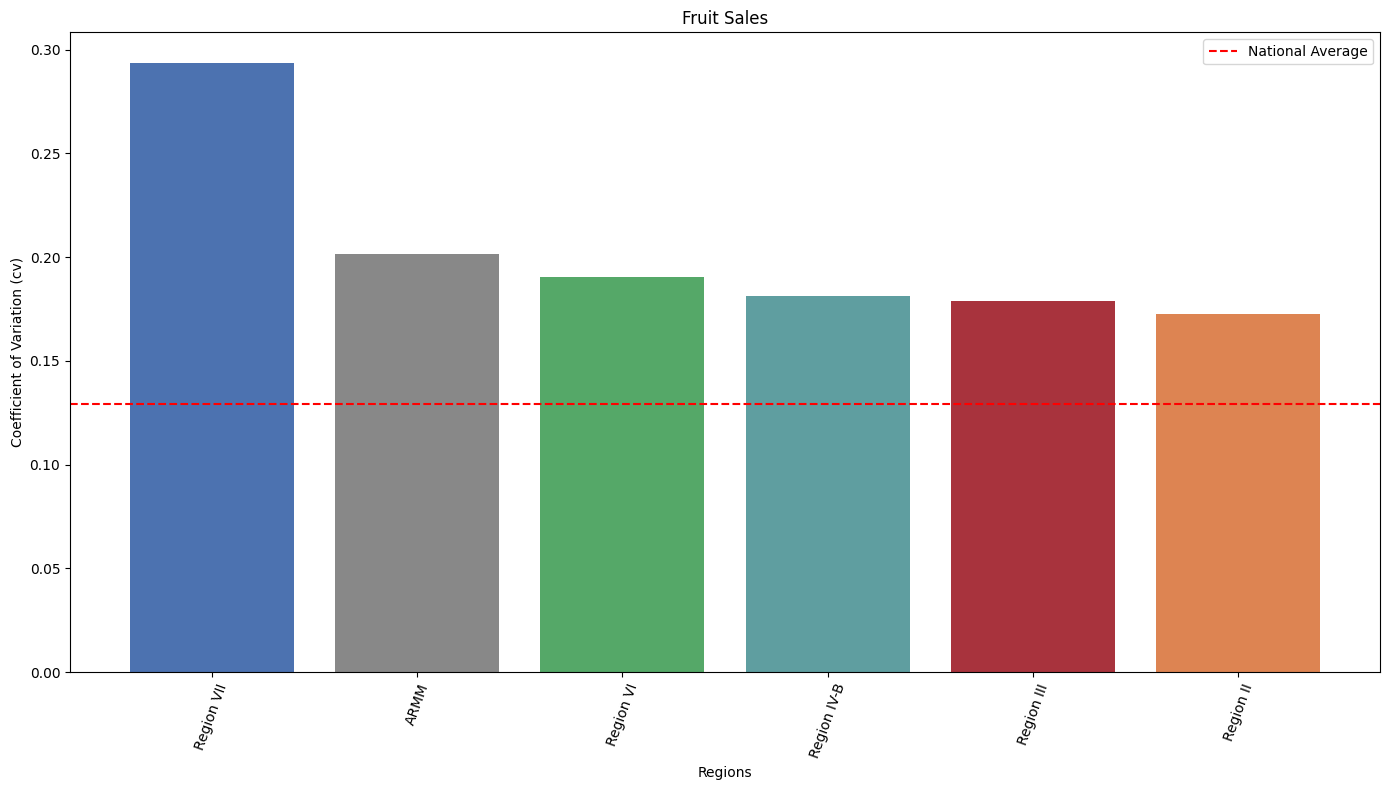

In [105]:
import matplotlib.pyplot as plt

# Get top 6 regions
top_6_regions = volatility_by_region.head(6)

# Replace long region name with abbreviation
top_6_regions["admin1"] = top_6_regions["admin1"].replace("Autonomous region in Muslim Mindanao", "ARMM")

# Example color list (use as many colors as you have regions)
colors = ['#4C72B0', '#888888', '#55A868', '#5F9EA0', '#A8333D', '#DD8452']

# Create the plot
fig, ax = plt.subplots(figsize=(14,8))
ax.bar(top_6_regions["admin1"], top_6_regions["cv"], color=colors)

# Rotate x-axis labels and add labels/title
plt.xticks(rotation=70)
ax.set_title('Fruit Sales')
ax.set_xlabel('Regions')
ax.set_ylabel('Coefficient of Variation (cv)')

# National average line
national_cv = all_rice_df.groupby('date')['price'].mean().reset_index()['price'].std() / all_rice_df['price'].mean()
ax.axhline(y=national_cv, color='r', linestyle='--', label='National Average')

# Add legend and show plot
ax.legend()
plt.tight_layout()
plt.show()


# INSERT INTERPRETATION AND INSIGHTS HERE

# Seasonal Pattern in Rice Price Volatility

Calculate the monthly data for the whole country


In [84]:
monthly_data = all_rice_df.copy()
monthly_data['month'] = monthly_data['date'].dt.month
monthly_data['year'] = monthly_data['date'].dt.year

# Calculate monthly average prices
monthly_avg = monthly_data.groupby(['year', 'month'])['price'].agg(['mean', 'std', 'count']).reset_index()
monthly_avg['cv'] = monthly_avg['std'] / monthly_avg['mean']

# Group by month only to see patterns across years
monthly_pattern = monthly_data.groupby('month')['price'].agg(['mean', 'std', 'count']).reset_index()
monthly_pattern['cv'] = monthly_pattern['std'] / monthly_pattern['mean']
monthly_pattern['month_name'] = monthly_pattern['month'].apply(lambda x: calendar.month_name[x])

print("Monthly Pattern")
monthly_pattern

Monthly Pattern


,month,mean,std,count,cv,month_name
0,1,46.458923,9.040283,1467,0.194587,January
1,2,46.590443,9.091518,1446,0.195137,February
2,3,46.825636,9.041895,1384,0.193097,March
3,4,45.850361,8.759144,1135,0.191038,April
4,5,45.451008,8.140104,1458,0.179096,May
5,6,45.584001,8.179403,1422,0.179436,June
6,7,45.662497,8.011080,1454,0.175441,July
7,8,45.959523,7.959333,1447,0.173181,August
8,9,46.748493,8.403121,1447,0.179752,September
9,10,46.231617,8.502284,1447,0.183906,October


In [85]:
# Prepare features for clustering: mean price, std_dev, cv
clustering_features = volatility_by_region[['mean_price', 'std_dev', 'cv']].copy()
print("Clustering Features")
clustering_features

Clustering Features


,mean_price,std_dev,cv
11,49.231232,14.457639,0.293668
0,51.257700,10.327408,0.201480
10,46.149963,8.783685,0.190329
7,46.426412,8.419563,0.181353
5,46.812312,8.366355,0.178721
4,43.360385,7.485251,0.172629
2,42.012710,7.244619,0.172439
3,45.368715,7.808248,0.172106
12,46.891913,7.928971,0.169090
9,46.248909,7.800062,0.168654


In [86]:
all_rice_data = all_rice_df.copy()
all_rice_data['date'] = pd.to_datetime(all_rice_data['date'])
all_rice_data['year_month'] = all_rice_data['date'].dt.to_period('M')

region_ts = (
    all_rice_data
    .groupby(['admin1','year_month'])['price']
    .mean()
    .unstack(level='year_month')
    .fillna(method='ffill', axis=1)   # fill forward any missing months
)

print("Region Time Series")
region_ts

Region Time Series


C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_24100\79126416.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill', axis=1)   # fill forward any missing months


year_month,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03
admin1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Autonomous region in Muslim Mindanao,35.8200,34.6000,35.0600,35.600000,35.600000,35.600000,35.600000,36.140000,36.600000,36.600000,36.600000,36.6000,36.930000,36.860000,36.600000,36.6000,36.600000,36.600000,36.600000,36.6000,35.9100,35.460000,34.780000,34.4000,34.5800,34.600000,34.600000,35.1500,37.1700,37.6000,39.200000,39.200000,39.2000,39.200000,39.200000,39.2000,39.2000,39.530000,41.200000,41.3100,42.6000,42.6000,42.600000,43.890000,45.600000,45.6000,44.680000,41.600000,40.6000,40.6000,40.600000,40.600000,40.6000,39.60,39.600000,39.6000,39.600000,39.600000,39.600000,39.6000,39.600000,39.600000,43.992500,44.960000,44.746429,44.780000,44.873571,44.479375,43.255625,42.533750,47.032941,47.468125,49.283077,49.260000,49.206154,49.153846,49.599231,49.556154,49.896923,49.537692,49.556923,49.563846,50.533846,50.630000,51.034615,51.109231,51.063846,51.346154,51.853077,51.943077,52.280769,51.982308,52.028462,51.873077,52.021538,52.045385,51.970000,52.080000,52.398462,53.100769,53.341538,52.277692,59.786923,60.550769,59.603846,59.633077,59.622308,60.295385,60.336154,60.197692,59.520769,58.728462,58.686154,57.926923,57.435385,57.290000,57.282308,56.985385,56.562308,55.724615,55.573846
Cordillera Administrative region,40.8000,40.8000,39.8300,39.000000,39.400000,39.370000,39.400000,39.400000,39.400000,39.400000,39.400000,39.4000,39.400000,39.030000,39.030000,39.1800,39.000000,39.000000,39.000000,39.0000,39.0000,39.000000,39.000000,39.0000,39.0000,39.000000,39.000000,39.0000,38.3100,37.8000,37.800000,37.770000,37.8000,37.800000,35.530000,34.3700,35.7400,38.770000,39.200000,40.1200,41.2000,41.8500,42.720000,43.010000,43.400000,43.4000,39.280000,39.000000,38.8500,38.8500,38.720000,34.120000,36.4800,36.52,36.520000,36.5200,36.520000,36.520000,36.520000,36.5200,36.520000,36.520000,44.260952,43.815714,43.557619,43.147619,43.175714,43.005238,42.161579,42.452857,42.472500,41.789474,42.533125,42.743750,42.854375,42.771250,42.900625,43.078750,42.998750,43.066250,43.110000,43.135000,42.906471,42.900588,42.833529,43.062941,43.182353,43.228235,43.086471,43.172941,43.224118,43.370000,43.334706,43.485294,43.300588,43.595294,43.854706,44.038824,44.039412,44.221765,44.461765,45.349412,48.837059,48.758235,49.679412,52.014118,53.177059,54.411765,54.950588,54.665294,54.895882,54.948235,54.515294,54.327059,54.470588,54.644706,54.268235,54.670000,53.636471,53.040000,53.344118
National Capital region,39.6425,39.2900,38.4100,37.817500,38.660000,38.590000,37.397500,37.400000,37.990000,37.492500,36.000000,36.0000,37.842500,36.115000,35.605000,35.6525,32.660000,32.660000,35.915000,36.4900,37.0875,37.060000,36.897500,36.9150,36.6875,36.800000,36.835000,36.9600,37.5250,37.8025,37.872500,38.012500,37.8500,37.995000,38.035000,38.1400,38.9225,38.350000,38.907500,38.8350,39.4525,40.4750,40.210000,42.272500,44.895000,43.1450,41.657500,40.790000,38.6825,38.8325,38.545000,37.480000,36.03

In [87]:
type_ts = (
    all_rice_data
      .groupby(['commodity','year_month'])['price']
      .mean()
      .unstack()
)

# propagate values both ways across the timeline:
type_ts = type_ts.ffill(axis=1).bfill(axis=1)  

print("Type Time Series")
print(type_ts.head(17).to_string(index=False))

Type Time Series
  2015-01   2015-02   2015-03   2015-04   2015-05   2015-06   2015-07   2015-08   2015-09   2015-10   2015-11   2015-12   2016-01   2016-02   2016-03   2016-04   2016-05   2016-06   2016-07   2016-08   2016-09   2016-10   2016-11   2016-12   2017-01   2017-02   2017-03   2017-04   2017-05   2017-06   2017-07   2017-08   2017-09   2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04   2018-05   2018-06   2018-07   2018-08   2018-09   2018-10   2018-11   2018-12   2019-01   2019-02   2019-03   2019-04   2019-05   2019-06   2019-07   2019-08   2019-09   2019-10   2019-11   2019-12   2020-01   2020-02   2020-05   2020-06   2020-07   2020-08   2020-09   2020-10   2020-11   2020-12   2021-01   2021-02   2021-03   2021-04   2021-05   2021-06   2021-07   2021-08   2021-09   2021-10   2021-11   2021-12   2022-01   2022-02   2022-03   2022-04   2022-05   2022-06   2022-07   2022-08   2022-09   2022-10   2022-11   2022-12   2023-01   2023-02   2023-03   2023-04   2

In [88]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
scaler = StandardScaler()

In [89]:

region_scaled = scaler.fit_transform(region_ts)
type_scaled   = scaler.fit_transform(type_ts)

## Utilize KMeans-Clustering using the prepared features (mean price, std dev, coefficient of variation)


In [90]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

In [91]:
# Determine optimal number of clusters using the elbow method
inertia = []
k_range = range(1, min(10, len(volatility_by_region)))  # Up to 9 clusters or number of regions
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

The Best K should be determined after seeing the plot


In [92]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
volatility_by_region['cluster'] = kmeans.fit_predict(scaled_features)

In [93]:
def plot_time_series():
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Select top 5 regions by data point count for better visualization
    top_regions = all_rice_df['admin1'].value_counts().head(5).index.tolist()
    
    for region in top_regions:
        region_data = monthly_avg_by_region[monthly_avg_by_region['admin1'] == region]
        ax.plot(region_data['year_month'], region_data['price'], label=region, alpha=0.7)
    
    # Add a 3-month moving average for the national average
    national_avg = monthly_avg_by_region.groupby('year_month')['price'].mean().reset_index()
    national_avg.set_index('year_month', inplace=True)
    ma_3month = national_avg['price'].rolling(window=3).mean()
    ax.plot(ma_3month.index, ma_3month.values, 'k--', linewidth=2, label='National 3-Month MA')
    
    ax.set_title('Rice Price Trends by Region (2018-2025)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (PHP)')
    ax.legend(title='Region')
    
    # Format x-axis to show only years
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    plt.tight_layout()
    return fig

In [94]:
def plot_volatility_indicators():
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Sort regions by coefficient of variation (CV)
    volatility_data = volatility_by_region.sort_values('cv', ascending=False).head(10)
    
    # Create a bar chart of CV values
    bars = ax.bar(volatility_data['admin1'], volatility_data['cv'])
    
    # Color bars by cluster
    for i, bar in enumerate(bars):
        cluster = volatility_data.iloc[i]['cluster']
        bar.set_color(plt.cm.viridis(cluster / 2))
    
    ax.set_title('Rice Price Volatility by Region')
    ax.set_xlabel('Region')
    ax.set_ylabel('Coefficient of Variation (σ/μ)')
    ax.set_xticklabels(volatility_data['admin1'], rotation=45, ha='right')
    
    # Add a horizontal line for the national average CV
    national_cv = all_rice_df.groupby('date')['price'].mean().reset_index()['price'].std() / all_rice_df['price'].mean()
    ax.axhline(y=national_cv, color='r', linestyle='--', label='National Average')
    
    ax.legend()
    plt.tight_layout()
    return fig

In [95]:
def plot_seasonality_heatmap():
    # Create pivot table of monthly prices by year and month
    pivot_data = monthly_avg.pivot(index='month', columns='year', values='mean')
    
    # Calculate percent change from annual average for each year
    for year in pivot_data.columns:
        year_avg = pivot_data[year].mean()
        pivot_data[year] = (pivot_data[year] - year_avg) / year_avg * 100
    
    # Create the heatmap
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Replace month numbers with month names
    pivot_data.index = [calendar.month_abbr[month] for month in pivot_data.index]
    
    sns.heatmap(pivot_data, cmap='RdBu_r', center=0, annot=True, fmt=".1f", ax=ax, 
                cbar_kws={'label': '% Difference from Annual Average'})
    
    ax.set_title('Seasonal Patterns in Rice Prices')
    ax.set_ylabel('Month')
    ax.set_xlabel('Year')
    
    plt.tight_layout()
    return fig

In [96]:
def plot_volatile_vs_stable():
    # Let's use range_ratio as our measure of volatility
    sorted_regions = volatility_by_region.sort_values('range_ratio')
    
    # Get 5 most stable and 5 most volatile regions
    stable_regions = sorted_regions.head(5)
    volatile_regions = sorted_regions.tail(5)
    
    # Combine them in a single DataFrame for plotting
    plot_data = pd.concat([stable_regions, volatile_regions])
    
    # Sort by volatility for the plot
    plot_data = plot_data.sort_values('range_ratio')
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create a bar chart
    bars = ax.barh(plot_data['admin1'], plot_data['range_ratio'])
    
    # Color the bars: green for stable, red for volatile
    for i, bar in enumerate(bars):
        if i < 5:  # Stable regions
            bar.set_color('green')
        else:  # Volatile regions
            bar.set_color('red')
    
    ax.set_title('Most Stable vs Most Volatile Rice Price Regions')
    ax.set_xlabel('Price Range Ratio ((max-min)/mean)')
    ax.set_ylabel('Region')
    
    # Add stability/volatility labels
    ax.text(plot_data['range_ratio'].max() * 0.05, 1, 'STABLE', fontsize=12, color='green')
    ax.text(plot_data['range_ratio'].max() * 0.8, 8, 'VOLATILE', fontsize=12, color='red')
    
    plt.tight_layout()
    return fig

In [97]:
def plot_kpis():
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Calculate KPIs
    current_avg_price = all_rice_df[all_rice_df['date'] == all_rice_df['date'].max()]['price'].mean()
    
    # Calculate year-over-year change
    yearly_avg = all_rice_df.groupby(all_rice_df['date'].dt.year)['price'].mean()
    annual_pct_change = yearly_avg.pct_change().mean() * 100  # average annual % change
    
    # Number of clusters identified
    cluster_count = len(volatility_by_region['cluster'].unique())
    
    # Overall volatility score (national CV)
    overall_cv = all_rice_df['price'].std() / all_rice_df['price'].mean() * 100  # as percentage
    
    # Create a simple text plot with KPIs
    ax.axis('off')
    
    ax.text(0.5, 0.8, 'KEY PERFORMANCE INDICATORS', fontsize=18, ha='center', weight='bold')
    
    ax.text(0.1, 0.6, f'Current Average Rice Price:', fontsize=14)
    ax.text(0.9, 0.6, f'₱{current_avg_price:.2f} per kg', fontsize=14, ha='right')
    
    ax.text(0.1, 0.5, f'Average Annual Price Change:', fontsize=14)
    ax.text(0.9, 0.5, f'{annual_pct_change:.2f}%', fontsize=14, ha='right', 
            color='red' if annual_pct_change > 0 else 'green')
    
    ax.text(0.1, 0.4, f'Overall Price Volatility:', fontsize=14)
    ax.text(0.9, 0.4, f'{overall_cv:.2f}%', fontsize=14, ha='right')
    
    ax.text(0.1, 0.3, f'Identified Market Clusters:', fontsize=14)
    ax.text(0.9, 0.3, f'{cluster_count}', fontsize=14, ha='right')
    
    # Add a box around the KPIs
    box = plt.Rectangle((0.05, 0.25), 0.9, 0.6, fill=False, edgecolor='gray', linewidth=2)
    ax.add_patch(box)
    
    plt.tight_layout()
    return fig

In [98]:
def plot_elbow_method():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(k_range, inertia, 'bo-')
    ax.set_xlabel('Number of clusters (k)')
    ax.set_ylabel('Inertia')
    ax.set_title('Elbow Method for Optimal k')
    plt.tight_layout()
    return fig

In [99]:
def generate_analysis_report():
    # Generate all the plots
    time_series_fig = plot_time_series()
    plt.savefig('time_series_plot.png', dpi=300, bbox_inches='tight')
    
    volatility_fig = plot_volatility_indicators()
    plt.savefig('volatility_indicators.png', dpi=300, bbox_inches='tight')
    
    seasonality_fig = plot_seasonality_heatmap()
    plt.savefig('seasonality_heatmap.png', dpi=300, bbox_inches='tight')
    
    volatile_stable_fig = plot_volatile_vs_stable()
    plt.savefig('volatile_vs_stable.png', dpi=300, bbox_inches='tight')
    
    kpis_fig = plot_kpis()
    plt.savefig('kpis.png', dpi=300, bbox_inches='tight')
    
    elbow_fig = plot_elbow_method()
    plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
    
    # Display the top 10 most volatile regions
    print("Top 10 Most Volatile Regions by CV:")
    print(volatility_by_region[['admin1', 'cv', 'mean_price']].head(10))
    
    print("\nSeasonal Patterns (Monthly averages across all years):")
    print(monthly_pattern[['month_name', 'mean', 'cv']])
    
    # Answer our research questions
    print("\nAnswering Research Questions:")
    print("1. How has the price of rice changed in different regions over time?")
    print("   - See the Time-Series Price Chart for visual representation.")
    
    #  NOT DEFINED
    # print("   - National average annual change: {:.2f}%".format(annual_pct_change))
    
    print("\n2. Which regions experience the most volatile rice prices?")
    print("   - Most volatile region: {}".format(volatility_by_region.iloc[0]['admin1']))
    print("   - See Volatility Indicators Chart and Top Volatile vs. Stable Regions charts.")
    
    print("\n3. Is there an existing seasonal pattern in rice price volatility?")
    print("   - See Seasonality Heatmap for visual patterns.")
    
    # Find which months have the highest and lowest prices on average
    highest_price_month = monthly_pattern.loc[monthly_pattern['mean'].idxmax()]
    lowest_price_month = monthly_pattern.loc[monthly_pattern['mean'].idxmin()]
    
    print("   - Month with highest average price: {} (₱{:.2f})".format(
        highest_price_month['month_name'], highest_price_month['mean']))
    print("   - Month with lowest average price: {} (₱{:.2f})".format(
        lowest_price_month['month_name'], lowest_price_month['mean']))
    
    # Show clusters and their characteristics
    print("\nCluster Analysis:")
    for cluster in volatility_by_region['cluster'].unique():
        cluster_regions = volatility_by_region[volatility_by_region['cluster'] == cluster]
        print(f"Cluster {cluster}:")
        print(f"  - Number of regions: {len(cluster_regions)}")
        print(f"  - Average CV: {cluster_regions['cv'].mean():.4f}")
        print(f"  - Average price: ₱{cluster_regions['mean_price'].mean():.2f}")
        print(f"  - Regions: {', '.join(cluster_regions['admin1'].head(3).tolist())}...")

### Group markets based on different rice types


In [100]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Create pivot table and combine multilevel headers
pivot_rice_df = all_rice_df.pivot_table(index="market", columns=["commodity", "pricetype"], values="price", aggfunc="mean")
pivot_rice_df.columns = ['_'.join(map(str, col)) for col in pivot_rice_df.columns]

# Fill/Remove missing values
pivot_rice_df = pivot_rice_df.fillna(pivot_rice_df.mean())

# Keep market labels
markets = pivot_rice_df.index

# Normalize and scale data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(pivot_rice_df)

X_scaled = pd.DataFrame(X_scaled, columns=pivot_rice_df.columns)
X_scaled


,"Rice (milled, superior)_Retail","Rice (milled, superior)_Wholesale",Rice (premium)_Retail,"Rice (regular, milled)_Retail","Rice (regular, milled)_Wholesale",Rice (special)_Retail,Rice (well milled)_Retail
0,0.372558,0.355386,0.414907,0.514255,0.347826,0.099911,0.461726
1,0.372558,0.355386,0.428409,0.450589,0.347826,0.135871,0.436607
2,0.372558,0.355386,0.439178,0.516358,0.347826,0.110125,0.459231
3,0.372558,0.355386,0.482139,0.388682,0.347826,0.221190,0.468122
4,0.372558,0.355386,0.323911,0.540187,0.347826,0.142729,0.446278
...,...,...,...,...,...,...,...
103,0.372558,0.355386,0.370301,0.750583,0.347826,0.268311,0.602975
104,0.372558,0.355386,0.449905,0.492759,1.000000,0.155964,0.528600
105,0.372558,0.355386,0.414907,0.554880,0.347826,0.103218,0.510206
106,0.372558,0.355386,0.716320,0.745379,0.347826,0.183585,0.629781


Next, we will use a silhouette_score to determine the optimal K for our algorithm. the higher the silhouette_value, the better it matches.

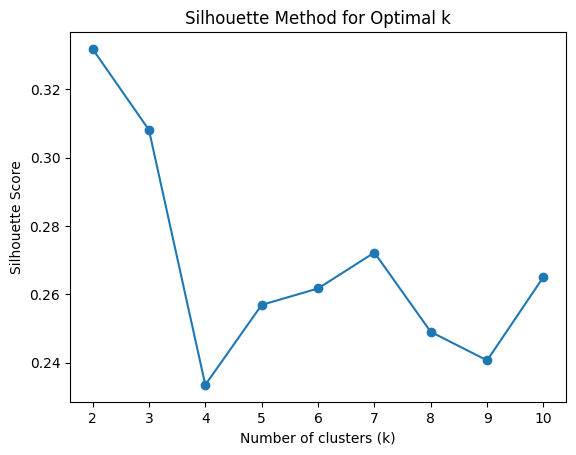

In [101]:
sil_scores = []
k_values = range(2, 11)  # silhouette score needs minimum 2 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, cluster_labels)
    sil_scores.append(sil)

# Plot silhouette scores
plt.plot(k_values, sil_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

108

Markets in Cluster 0:
['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay', 'Antique', 'Apayao', 'Aurora', 'Baguio City', 'Bataan', 'Batangas City', 'Benguet', 'Bukidnon', 'Bulacan', 'Butuan City', 'Cabanatuan City', 'Cagayan', 'Cagayan de Oro City', 'Calapan City', 'Camarines Norte', 'Capiz', 'Catanduanes', 'Catarman', 'Cavite', 'Cebu City', 'Cotabato', 'Cotabato City', 'Davao Oriental', 'Davao de Oro', 'Davao del Norte', 'Davao del Sur', 'Eastern Samar', 'Ifugao', 'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Kidapawan City', 'Koronadal', 'La Trinidad', 'La Union (Ilocos Region)', 'Lanao del Norte', 'Legazpi City', 'Lingayen', 'Marinduque', 'Metro Manila', 'Misamis Occidental', 'Naga City', 'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Palayan', 'Pangasinan', 'Puerto Princesa', 'Quezon', 'Quirino', 'Rizal', 'San Fernando City', 'Santa Cruz', 'Sarangani', 'Shariff Aguak', 'Sorsogon', 'South Cotabato', 'Sul

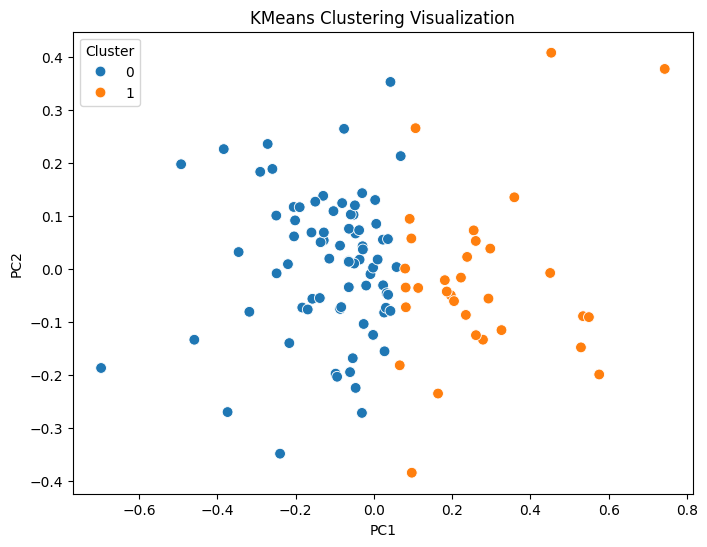

In [102]:
model = KMeans(n_clusters=2, random_state=0, n_init='auto')
labels = model.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

import pandas as pd
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = labels
df_plot['Market'] = markets.values 


print(len(markets))

for cluster_id in sorted(df_plot['Cluster'].unique()):
    print(f"\nMarkets in Cluster {cluster_id}:")
    print(df_plot[df_plot['Cluster'] == cluster_id]['Market'].tolist())
    
    
# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title('KMeans Clustering Visualization')
plt.show()


The KMeans clustering visualization, projected through Principal Component Analysis (PCA), reveals two distinct clusters of markets based on their rice pricing patterns. By reducing the high-dimensional rice price data into two principal components (PC1 and PC2), we can observe the underlying structure in how different markets behave with respect to rice prices. Each point in the plot represents a market, and its position reflects its pricing profile relative to others. The markets have been grouped into two clusters—Cluster 0 and Cluster 1—based on similarities in these profiles.

Cluster 0, shown in blue, contains a majority of the markets, including Metro Manila, Cebu City, and Davao del Sur. These markets likely share similar pricing trends, potentially reflecting more stable or uniform pricing structures. This cluster may represent areas with more developed market infrastructures or centralized pricing mechanisms.

On the other hand, Cluster 1, shown in orange, comprises fewer markets such as Basilan, Davao City, and Iloilo City. The distinction suggests that these markets have pricing behaviors that differ significantly from those in Cluster 0. These differences could be driven by factors such as regional supply chains, logistical challenges, consumer demand variation, or even policy and subsidy differences.

As a data scientist, this clustering provides a foundation for deeper analysis. For instance, we can now investigate what specific rice types or price levels are driving the separation between clusters. Additionally, these insights can be valuable for stakeholders such as policymakers, supply chain managers, and market analysts aiming to optimize rice distribution, pricing policies, or targeted subsidies. By identifying which markets behave similarly, interventions can be more precisely tailored and impactful.

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_24100\1314649350.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(volatility_data['admin1'], rotation=45, ha='right')


Top 10 Most Volatile Regions by CV:
                                  admin1        cv  mean_price
11                            Region VII  0.293668   49.231232
0   Autonomous region in Muslim Mindanao  0.201480   51.257700
10                             Region VI  0.190329   46.149963
7                            Region IV-B  0.181353   46.426412
5                             Region III  0.178721   46.812312
4                              Region II  0.172629   43.360385
2                National Capital region  0.172439   42.012710
3                               Region I  0.172106   45.368715
12                           Region VIII  0.169090   46.891913
9                               Region V  0.168654   46.248909

Seasonal Patterns (Monthly averages across all years):
   month_name       mean        cv
0     January  46.458923  0.194587
1    February  46.590443  0.195137
2       March  46.825636  0.193097
3       April  45.850361  0.191038
4         May  45.451008  0.179096
5    

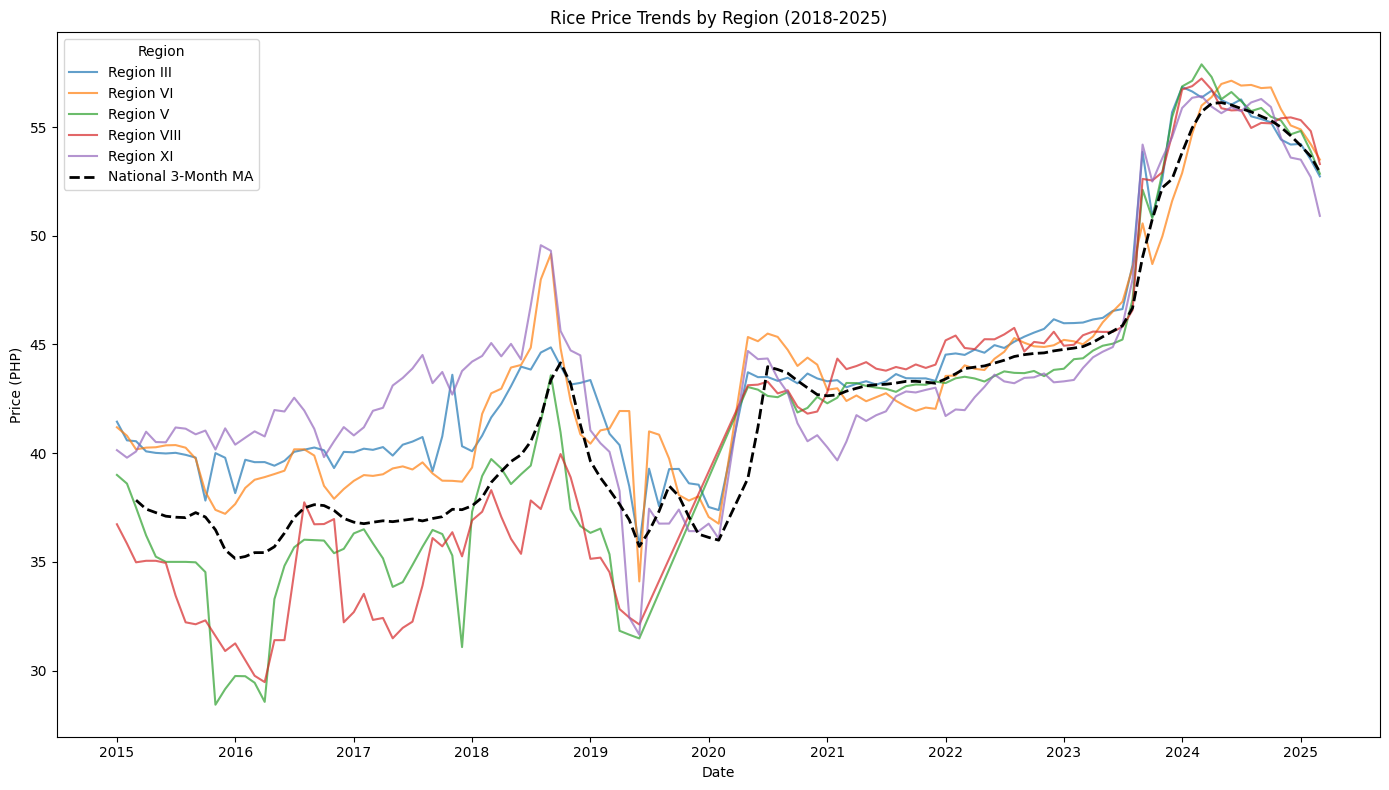

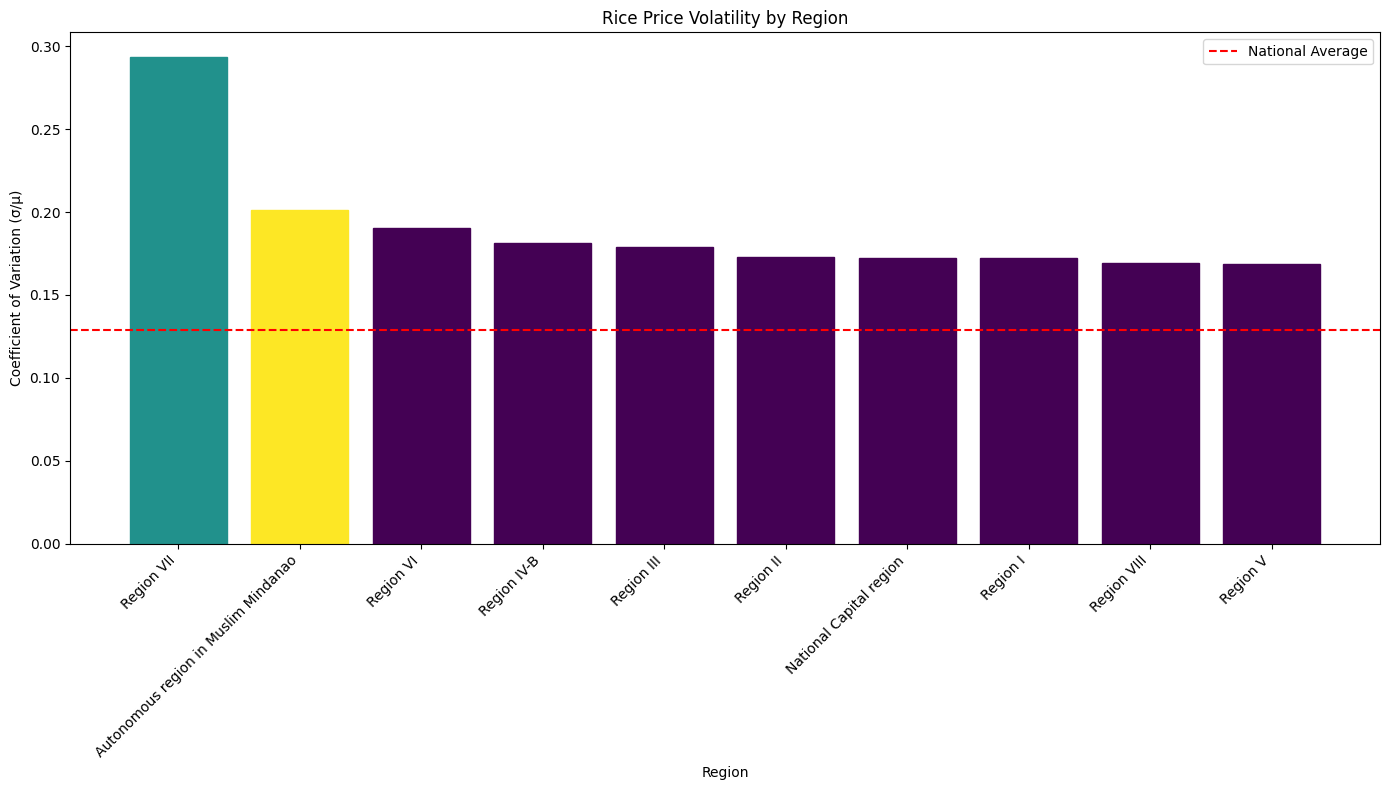

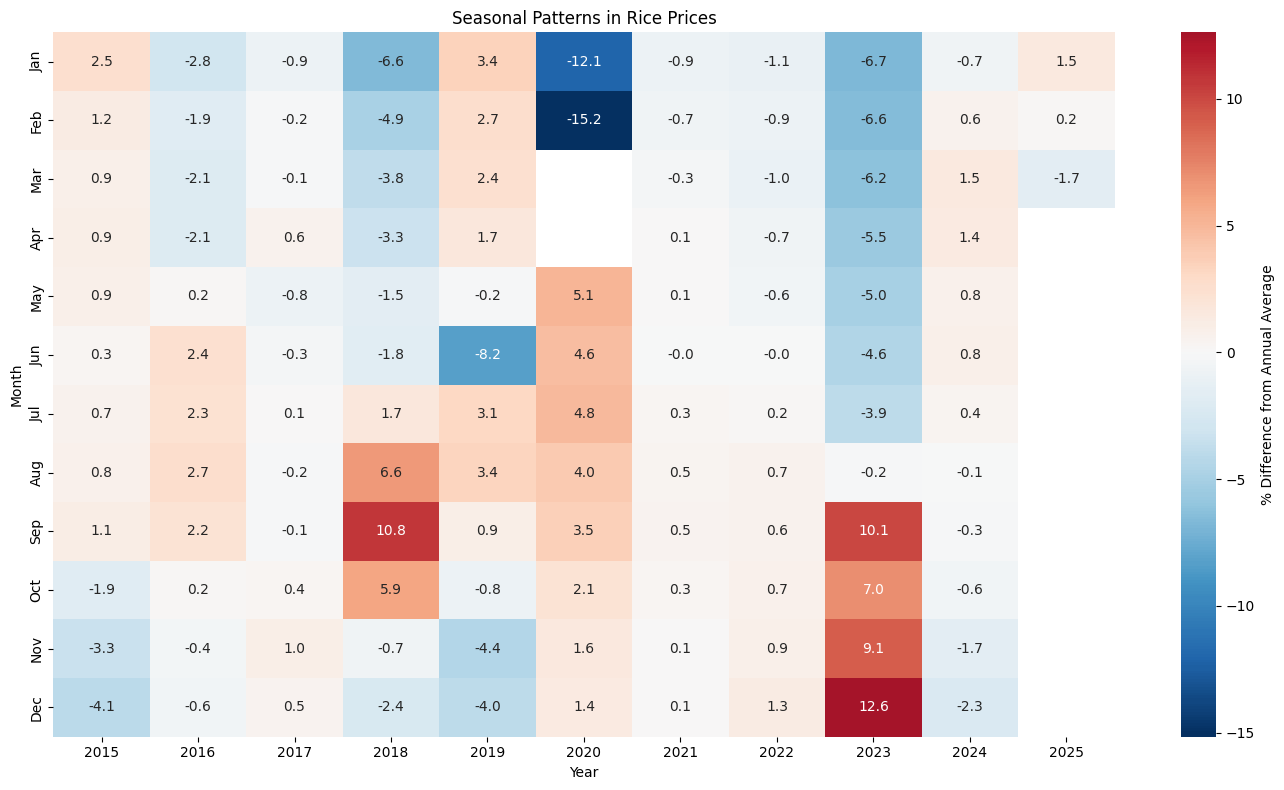

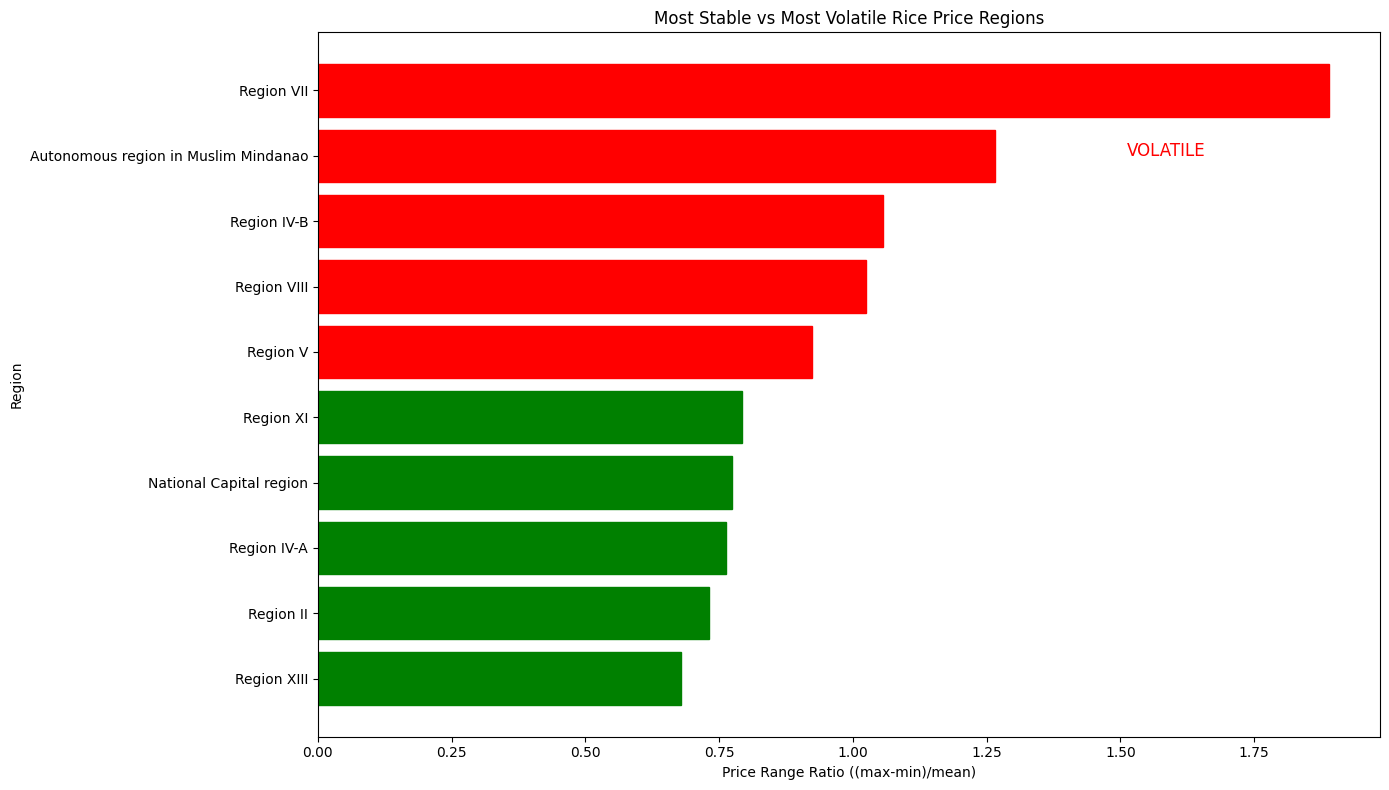

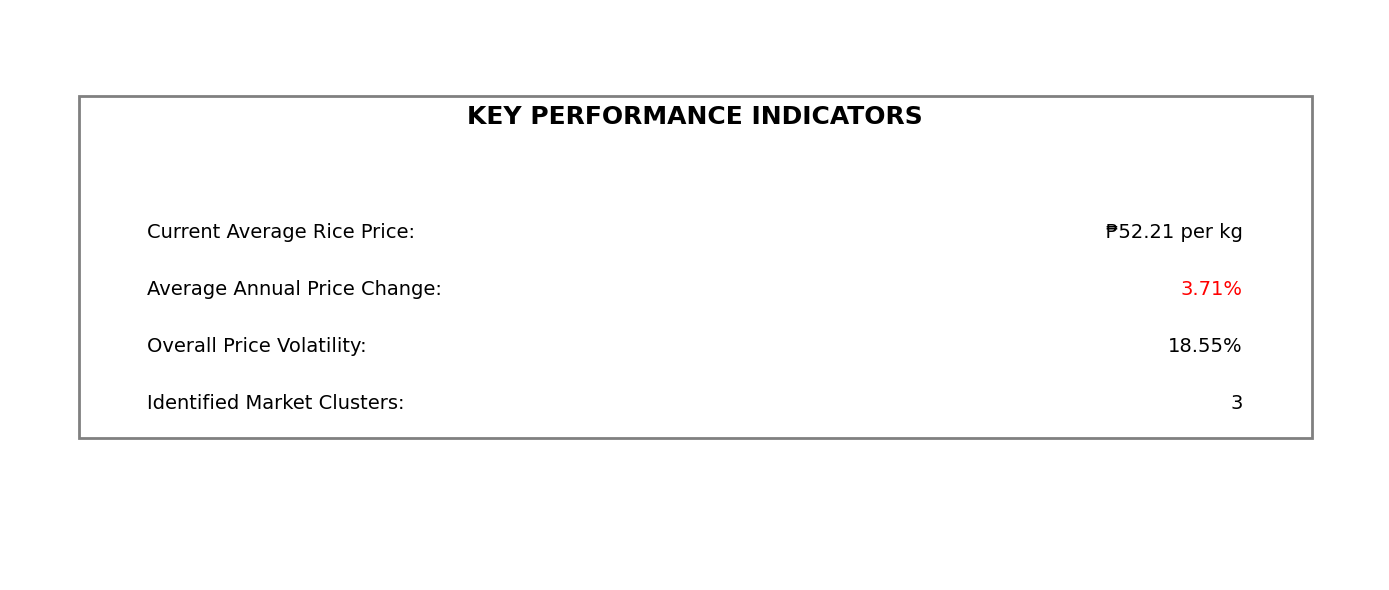

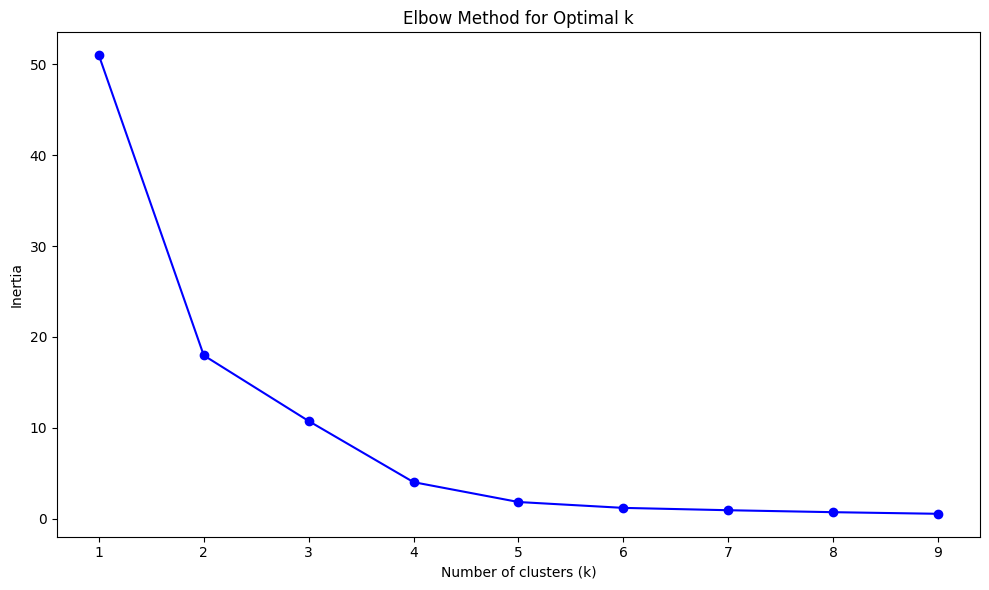

<Figure size 1400x800 with 0 Axes>

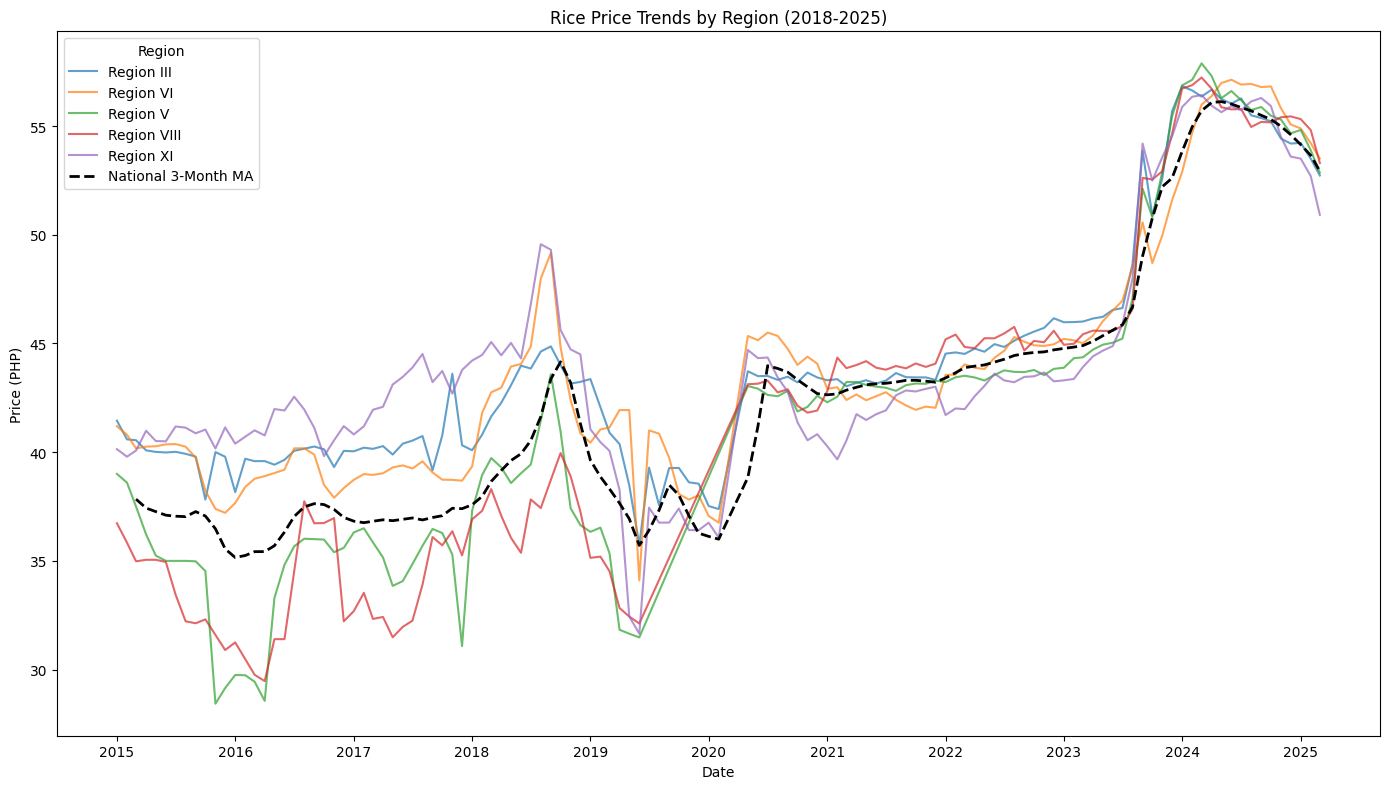

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_24100\1314649350.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(volatility_data['admin1'], rotation=45, ha='right')


<Figure size 1400x800 with 0 Axes>

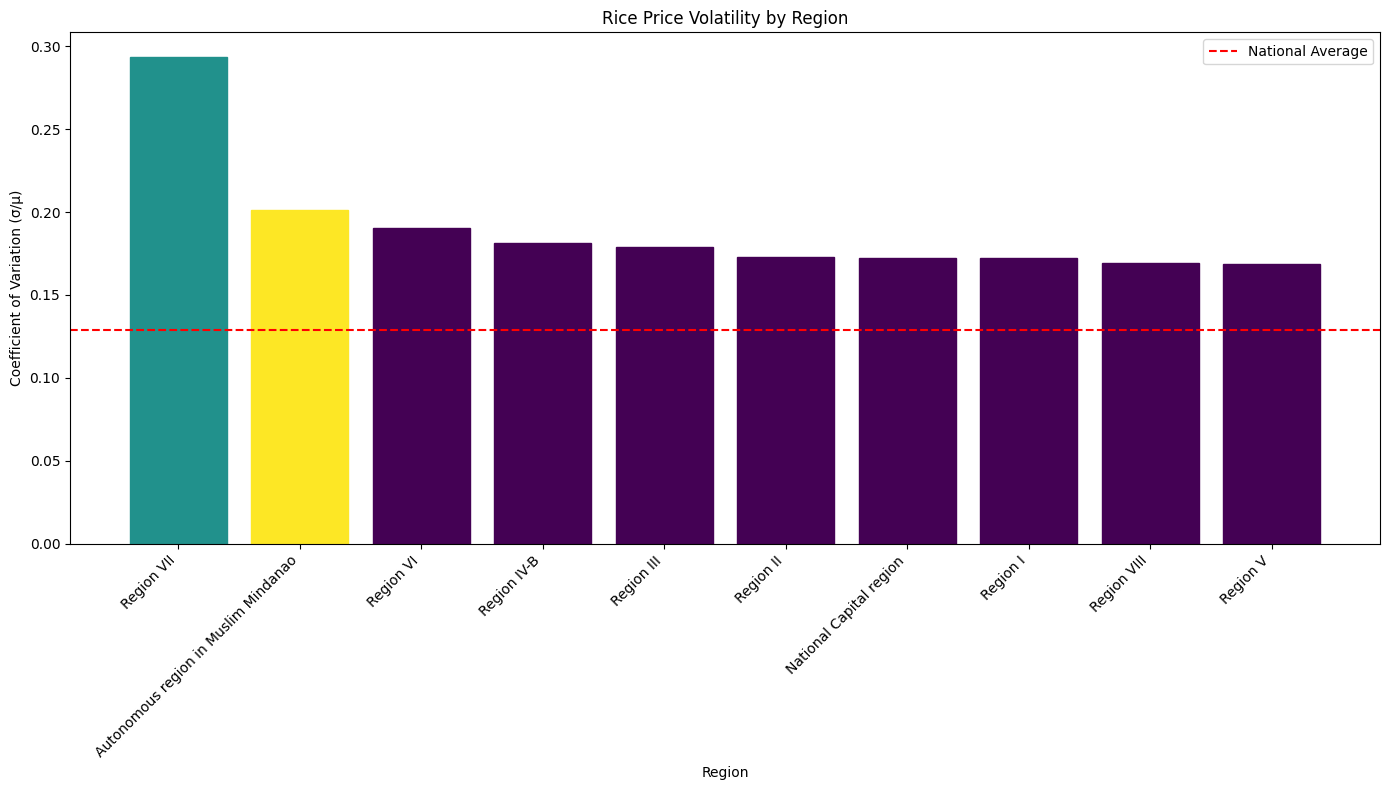

<Figure size 1400x800 with 0 Axes>

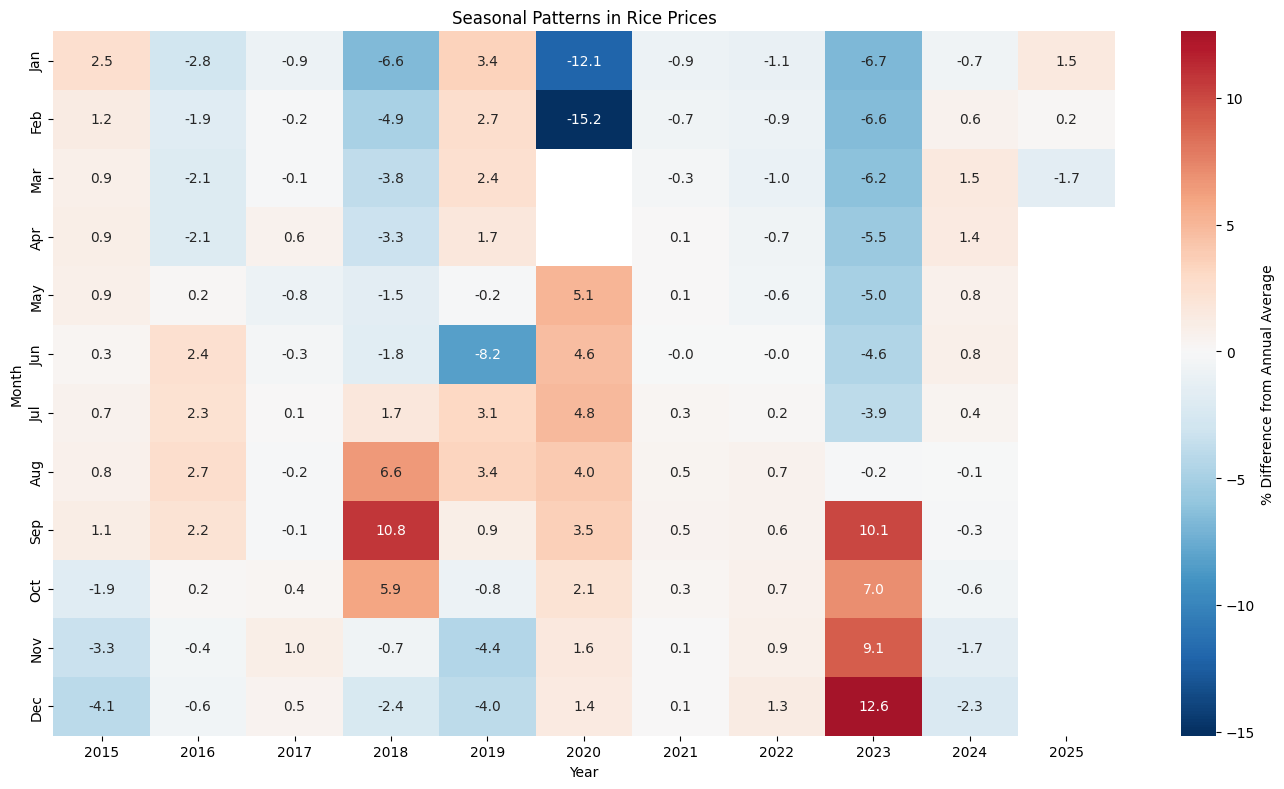

<Figure size 1400x800 with 0 Axes>

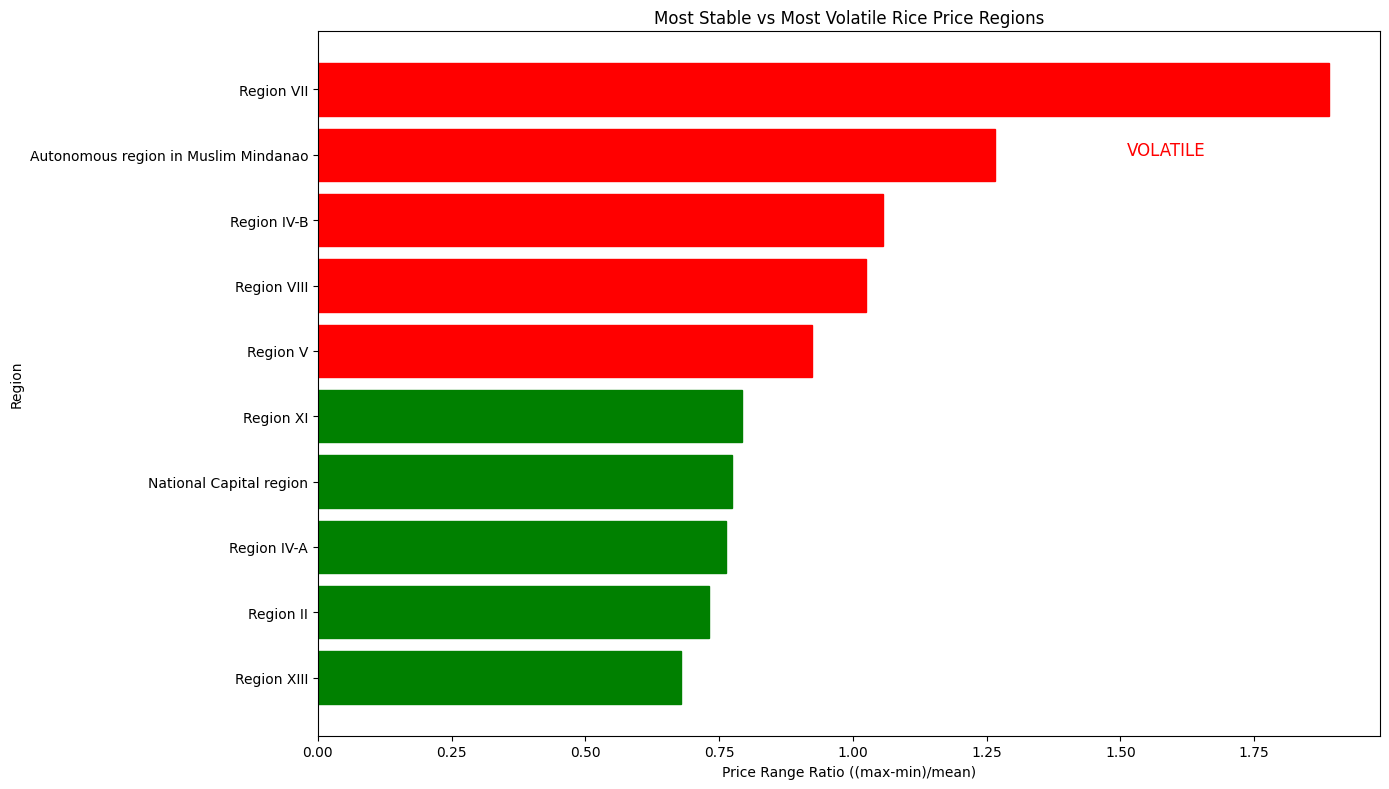

<Figure size 1400x600 with 0 Axes>

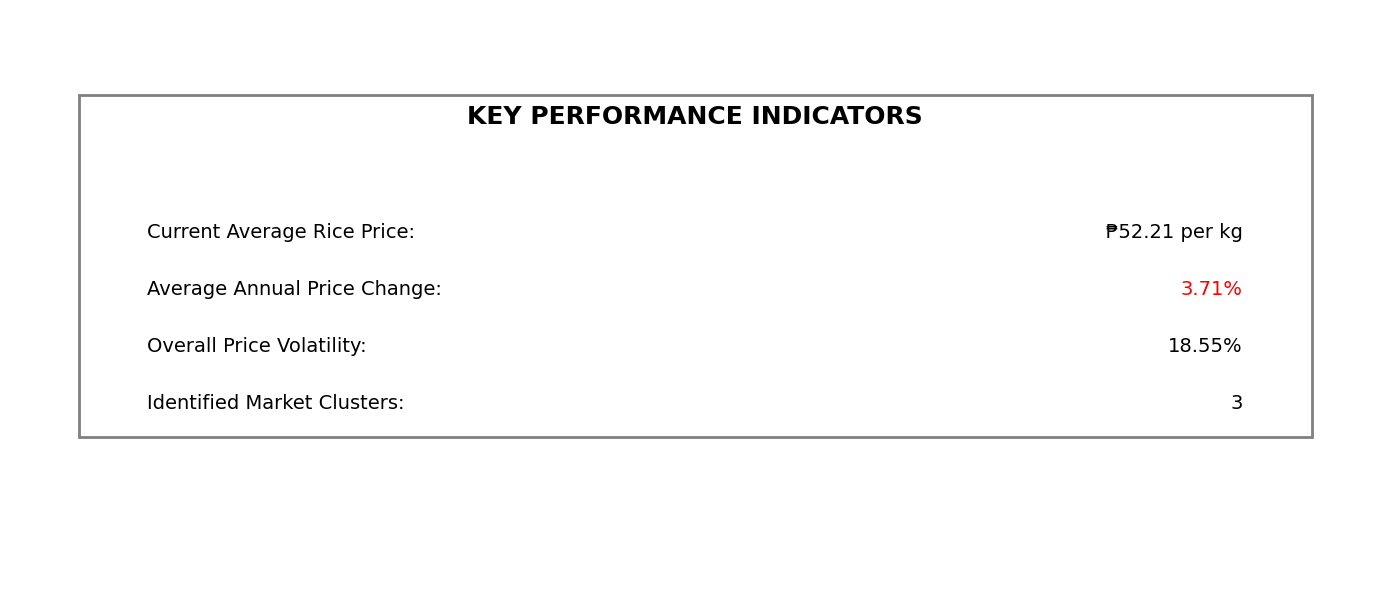

In [103]:
# Run the analysis
generate_analysis_report()

# Display plots interactively
plt.figure(figsize=(14, 8))
plot_time_series()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plot_volatility_indicators()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plot_seasonality_heatmap()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plot_volatile_vs_stable()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plot_kpis()
plt.tight_layout()
plt.show()